In [1]:
%matplotlib inline

## Load the MNIST digit dataset

In [2]:
#import pylab as plt
from sklearn.datasets import fetch_openml

# Download the MNIST dataset
X, y = fetch_openml(name='mnist_784', version=1, data_id=None, return_X_y=True)

# normalize the sample into [0, 1]
X *= 1. / 255

## Testing BCM model on MNIST dataset

In [3]:
from plasticity.cython import BCM
from plasticity.cython.optimizer import SGD, Adam
from plasticity.cython.weights import GlorotNormal

model = BCM(outputs=100, num_epochs=10, optimizer=Adam(learning_rate=4e-2), 
            weights_init=GlorotNormal(), interaction_strength=-0.1,
            activation='Relu', batch_size=1000)

In [4]:
%%time
model.fit(X)

CPU times: user 28.7 s, sys: 359 ms, total: 29.1 s
Wall time: 2.32 s


/mnt/c/Users/nico.curti2/Code/plasticity/plasticity/utils/misc.py:243: RuntimeWarning: The current version does not allow to redirect the stdout using an IPython console.
  warnings.warn('The current version does not allow to redirect the stdout using an IPython console.', RuntimeWarning)


BCM(epochs_for_convergency=1, convergency_atol=0.01, interaction_strength=-0.1, verbose=True, activation="Relu", optimizer=Adam(B2=0.9990000128746033, clip_value=False, momentum=0.8999999761581421, rho=0.0, learning_rate=0.03999999910593033, l2norm=False, B1=0.8999999761581421, decay=9.999999747378752e-05, update_type="Adam"), batch_size=1000, random_state=42, outputs=100, num_epochs=10, weights_init=GlorotNormal(seed=42, mu=0.0, sigma=1.0, scale=1.0))

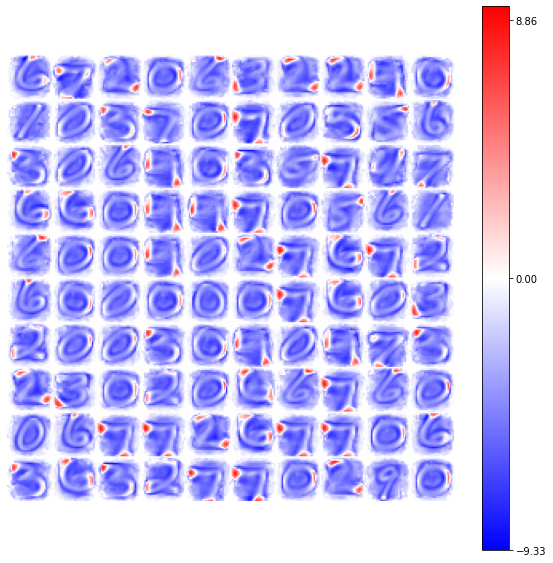

In [5]:
from plasticity.utils import view_weights

view_weights (model.weights, dims=(28, 28))

## Testing Hopfield model on MNIST dataset

In [6]:
from plasticity.cython import Hopfield
from plasticity.cython.optimizer import SGD, Adam

model = Hopfield(outputs=100, num_epochs=10, optimizer=SGD(learning_rate=2e-2),
                 batch_size=100)

In [7]:
%%time
model.fit(X)

CPU times: user 36 s, sys: 344 ms, total: 36.4 s
Wall time: 2.79 s


/mnt/c/Users/nico.curti2/Code/plasticity/plasticity/utils/misc.py:243: RuntimeWarning: The current version does not allow to redirect the stdout using an IPython console.
  warnings.warn('The current version does not allow to redirect the stdout using an IPython console.', RuntimeWarning)


Hopfield(epochs_for_convergency=1, p=2.0, convergency_atol=0.01, k=2, verbose=True, optimizer=SGD(B2=0.9990000128746033, clip_value=False, momentum=0.8999999761581421, rho=0.0, learning_rate=0.019999999552965164, l2norm=False, B1=0.8999999761581421, decay=9.999999747378752e-05, update_type="SGD"), batch_size=100, random_state=42, outputs=100, delta=0.4, num_epochs=10, weights_init=Normal(seed=42, mu=0.0, sigma=1.0, scale=1.0))

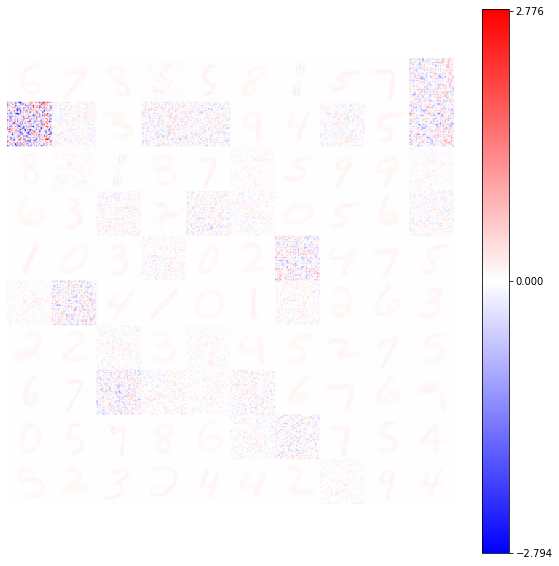

In [8]:
from plasticity.utils import view_weights

view_weights (model.weights, dims=(28, 28))